In [1]:
import os
import cv2
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

print("all libraries imported")

2025-07-22 15:47:39.992644: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-22 15:47:40.018421: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


all libraries imported


In [ ]:
import os
import cv2
import numpy as np

X_train = []
Y_train = []
image_size = 150
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Load Training Images
for label in labels:
    folderPath = os.path.join('/home/petpooja/Documents/other projects/brain_tumor_project/brain_tumor/Training_resized', label)
    for filename in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, filename))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(label)

# Load Testing Images
for label in labels:
    folderPath = os.path.join('/home/petpooja/Documents/other projects/brain_tumor_project/brain_tumor/Testing_resized', label)
    for filename in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, filename))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(label)

X_train = np.array(X_train)
Y_train = np.array(Y_train)


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.1, random_state=101)


In [4]:
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

if isinstance(Y_train[0], str):
    Y_train_new = []
    for i in Y_train:
        Y_train_new.append(labels.index(i))
    Y_train = Y_train_new

if isinstance(Y_test[0], str):
    Y_test_new = []
    for i in Y_test:
        Y_test_new.append(labels.index(i))
    Y_test = Y_test_new

import tensorflow as tf
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)


## Convolutional Neural Network

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(Conv2D(256,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
#nn
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation = 'softmax'))



/home/petpooja/miniconda3/envs/ds_env/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Model Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 252, 252, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 126, 126, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 126, 126, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 124, 124, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 122, 122, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 122, 122, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 61, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 61, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 59, 59, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 57, 57, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 55, 55, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 27, 27, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 27, 27, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 25, 25, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 23, 23, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 11, 11, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 11, 11, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    15,860,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,029,956 (64.96 MB)

 Trainable params: 17,029,956 (64.96 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Compilation
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [8]:
# Training
history = model.fit(X_train,Y_train,epochs=30,validation_split=0.1)

Epoch 1/30
  6/174 ━━━━━━━━━━━━━━━━━━━━ 12:12 4s/step - accuracy: 0.1761 - loss: 40.8699

KeyboardInterrupt: 

## accuracy

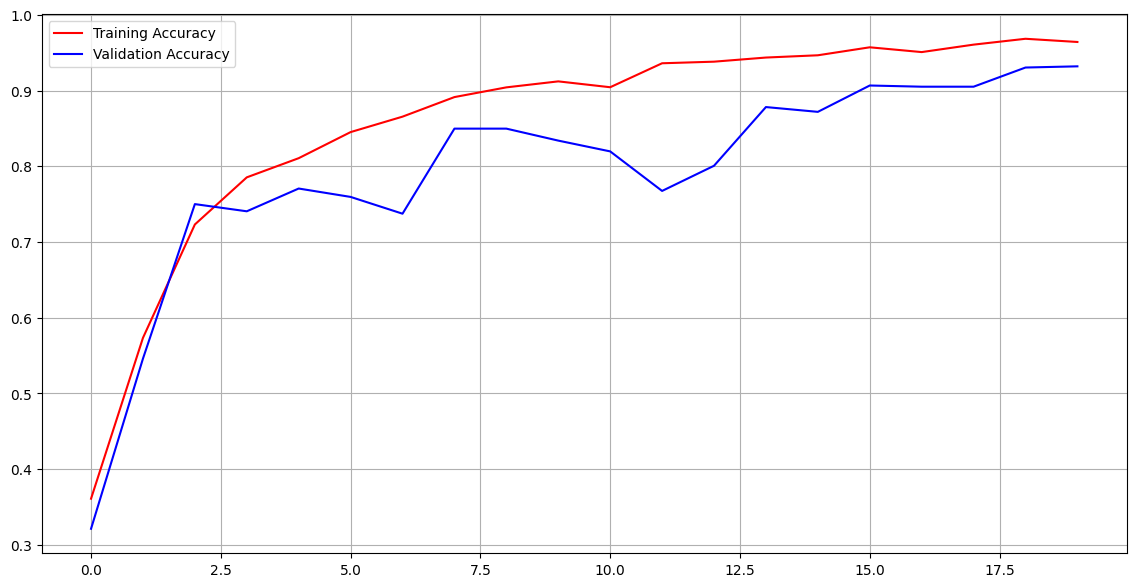

In [10]:
import matplotlib.pyplot as plt 

model.save('braintumor.h5')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")  
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

## Model Saving and Training vs. Validation Accuracy
After training, the model is saved as `braintumor.h5` for future use.

The plot shows the **Training Accuracy** (red curve) and **Validation Accuracy** (blue curve) over the epochs. 

- If validation accuracy is lower than training accuracy, it could indicate overfitting. 
- In this case, both accuracies increase steadily, suggesting the model is learning well and generalizing to new data.

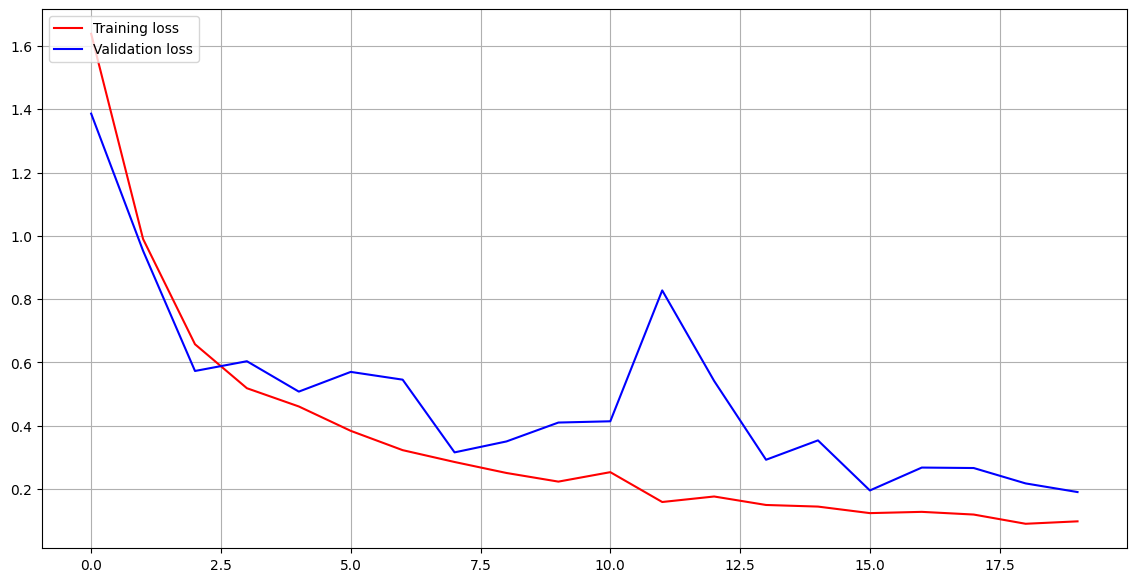

In [11]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training loss")  
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


## Training and Validation Loss Visualization
We also plotted the **Training Loss** (red curve) and **Validation Loss** (blue curve) over the epochs.

- The plot helps visualize how the model's loss decreased during training and how well it performed on validation data.
- A steady decrease in both training and validation loss indicates that the model is improving and generalizing well to unseen data.


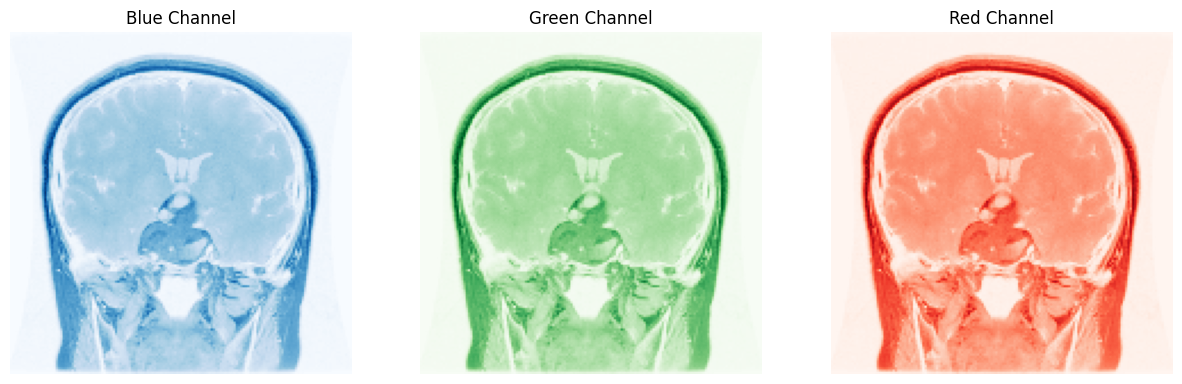

In [12]:
img = cv2.imread('/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0015.jpg')

img_resized = cv2.resize(img, (150, 150))

b, g, r = cv2.split(img_resized)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(b, cmap='Blues')
axs[0].set_title('Blue Channel')
axs[0].axis('off')

axs[1].imshow(g, cmap='Greens')
axs[1].set_title('Green Channel')
axs[1].axis('off')

axs[2].imshow(r, cmap='Reds')
axs[2].set_title('Red Channel')
axs[2].axis('off')

plt.show()


## Confusion matrix

A confusion matrix is a tool that helps to evaluate the performance of a model, particularly for classification problems. It compares the actual and predicted labels, and generates a table that summarizes the correct and incorrect predictions.

Here is an example of a basic confusion matrix:

|               | Predicted Positive | Predicted Negative |
|---------------|--------------------|--------------------|
| **Actual Positive** | True Positive (TP)  | False Negative (FN) |
| **Actual Negative** | False Positive (FP) | True Negative (TN)  |

- **True Positive (TP)**: The model correctly predicted the positive class.
- **True Negative (TN)**: The model correctly predicted the negative class.
- **False Positive (FP)**: The model incorrectly predicted the positive class.
- **False Negative (FN)**: The model incorrectly predicted the negative class.

Using the confusion matrix, you can calculate various performance metrics like accuracy, precision, recall, F1-score, etc.


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step


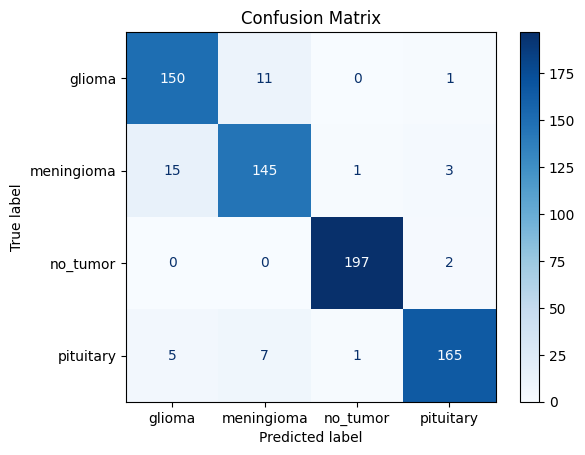

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)  
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(Y_test, axis=1)         

cm = confusion_matrix(y_true, y_pred_classes)

class_names = ['glioma', 'meningioma', 'no_tumor', 'pituitary']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


## Preprocessing and Preparing Image for Prediction
We loaded a sample MRI image of a pituitary tumor using `cv2.imread()` and resized it to 150x150 pixels. The image was then converted into a NumPy array using `np.array()` and reshaped to match the input dimensions expected by the model (1, 150, 150, 3).

This image is now ready for prediction using the trained model.


In [14]:
img_array = np.array(img_resized)

img_array = img_array.reshape(1, 150, 150, 3)

print(img_array.shape) 

(1, 150, 150, 3)


## Reshaping Image Array for Model Input
The image array is reshaped to have the shape (1, 150, 150, 3) to match the input requirements of the CNN model. This reshaped array can now be passed to the model for prediction.


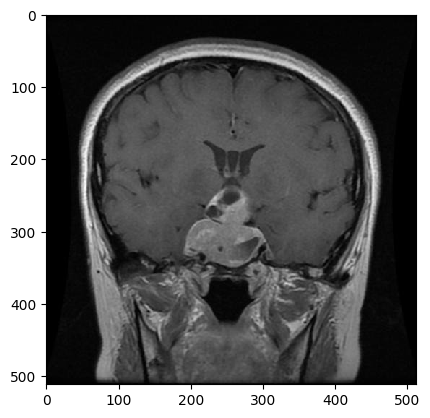

In [15]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

img = image.load_img('/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0015.jpg')
plt.imshow(img, interpolation='nearest')
plt.show()

## Visualizing the Input Image Before Prediction
The image is loaded using Keras' `load_img` function and displayed using Matplotlib. This allows us to visualize the input image before passing it to the model.


In [16]:
a=model.predict(img_array)
indices = a.argmax()
indices

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 665ms/step


3

## Model Prediction and Class Index Determination
The model's prediction is obtained using `model.predict()` on the reshaped image array. The predicted class index is determined by finding the index with the highest probability using `argmax()`.

## Thank You!